<center>
    <h1 id='advanced-uses-of-shap-values' style='color:#7159c1'>🔎 Advanced Uses of Shap Values 🔎</h1>
    <i>How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?</i>
</center>

---

There are two great advanced uses of Shap Values: `Summary Plots` and `Contribution Plots`.

<h1 id='0-summary-plots' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | Summary Plots</h1>

They are used with Permutation Importance in order to know both the features' importance and how they affect the predictions (increase/decrease predictions and if the values are low/high to affect the predictions).

Besides, different from Shap Values, where we can use a single or multiple rows, you MUST use the WHOLE VALIDATION DATASET in Summary Plots in order to get a general result!!

In [2]:
# ---- Importations ----
import pandas as pd # pip install pandas

from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.ensemble import RandomForestRegressor

import shap # pip install shap

import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install cyberpunk

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

# ---- Preparing the Model ----
random_forest_model = RandomForestRegressor(
    n_estimators=100
    , random_state=20242301
)

random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=20242301)

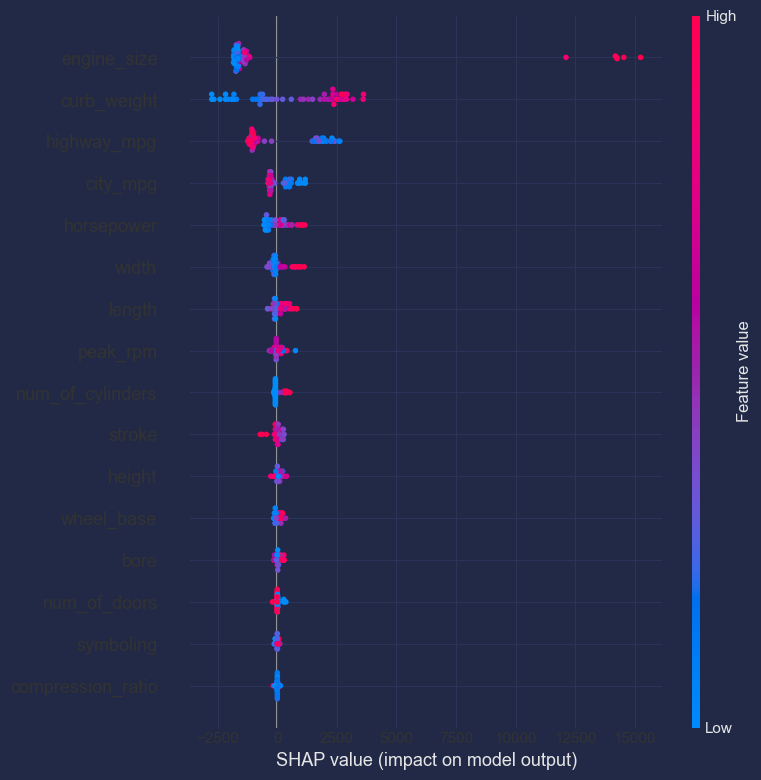

In [4]:
# ---- Calculating Shap Values ----
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_valid) # yeah, we use the whole validation dataset
shap.summary_plot(shap_values, X_valid)

---

Observations:

/ When plotting, we call `shap_values`. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True";

/ Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.

<h1 id='0-contribution-plots' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | Contribution Plots</h1>

They are used with Partial Plots in order to know the both how the features impact the predictions and and the correlation between two features.

Besides, different from Shap Values, where we can use a single or multiple rows, you MUST use the WHOLE VALIDATION DATASET in Contribution Plots in order to get a general result!!

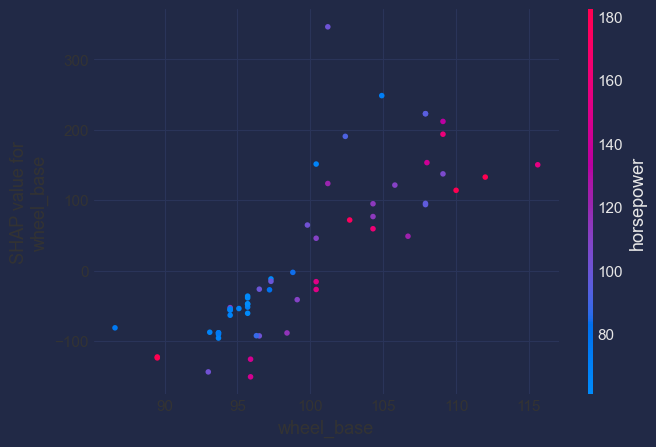

In [6]:
# Plotting
#
# param 1 >> feature
# param 2 >> positive outcome
# param 3 >> validation dataset
# param 4 >> feature for interaction
#
shap.dependence_plot('wheel_base', shap_values, X_valid, interaction_index="horsepower")

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).